In [12]:
import os
from sklearn.cluster import KMeans
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
warnings.filterwarnings('ignore')
path = os.getcwd() + '\\Analise e Tratamento\\Dados\\'

#Valores escalonados
df = pd.read_csv(path + 'Clientes_LE_ESC.csv', sep = ';', encoding = 'utf-8')
df.head()

,0,1,2,3
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [14]:
dados = df.iloc[:, 0:4].values


In [15]:
#Obtendo os WCSS a partir do número de clusters 
#Testando até 10 clusters para obter o ponto de inflexão

wcss = []
for i in range(1, 15):
    #Iniciando o modelo para cada número de clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    #Treinando o modelo para o número de clusters inicializados
    kmeans.fit(dados)
    #Obtendo o WCSS
    wcss.append(kmeans.inertia_)
    

Text(0, 0.5, 'WCSS - Within Clusters Sum of Squares')

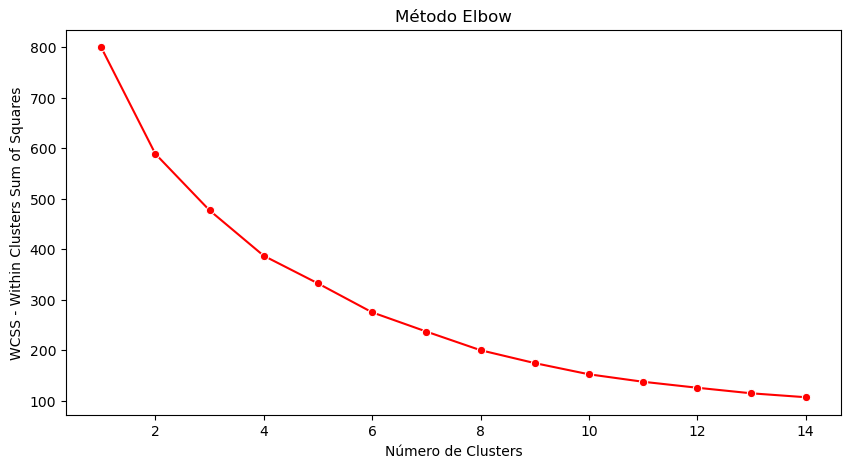

In [16]:
plt.figure(figsize = (10,5))
sb.lineplot(x = range(1,15), y = wcss, marker = 'o', color='red')
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS - Within Clusters Sum of Squares')

In [17]:
#Conforme o gráfico o ponto de inflexão fica em 6 clusters
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 5, max_iter = 300)
clusters = kmeans.fit(dados)

In [18]:
#Coordenadas do centróides
centroides = clusters.cluster_centers_
centroides

array([[ 1.12815215,  1.22385356, -0.4498575 , -0.44231533],
       [-0.71852548, -0.46169904,  1.09030974,  1.17305816],
       [-0.88640526,  0.86299444, -0.43455895, -0.40762639],
       [-0.88640526, -0.92608124, -0.70017176,  0.28182355],
       [ 0.25517727,  0.0729628 ,  1.14279271, -1.32381522],
       [ 1.12815215, -0.77111419, -0.08465578,  0.8197479 ]])

In [19]:
cluster_id = clusters.labels_

In [20]:
cluster_id_column = pd.DataFrame(cluster_id, columns = ['ClusterID'])

In [21]:
df_2 = pd.read_csv(path + 'Clientes.csv', sep = ';', encoding = 'utf-8')
df_2 = pd.concat([df_2, cluster_id_column], axis = 1)
df_2

,ClienteID,Genero,Idade,Rendimento,Pontuacao,ClusterID
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


In [22]:
df_3 = df_2.loc[df_2.ClienteID == 147]
df_3

,ClienteID,Genero,Idade,Rendimento,Pontuacao,ClusterID
146,147,Male,48,77,36,0
